<a href="https://colab.research.google.com/github/dkchebet7/Regression/blob/master/week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reseach Question

Give a prediction results between two teams based on home and away and based on whether the game is friendly or not




## Metrics of success

 Give conclusive results from the analysis

## Experimental Design

1. Importing all the necessary libraries
2. clean data
3. Perfom Experimental designs
4. Perfom Regression Analysis(Logistic regression and Polynomial regrssion)
5. Give Insightful Conclusions from my analysis



## Libraries

In [0]:
## Importing necessray libraries

import pandas as pd
import numpy as np

## Plotting Libraries
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline






## Loading datasets

In [2]:
## Loading the fifa datase

fifa = pd.read_csv('/content/fifa_ranking.csv')

## Previewing fifa dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [33]:
## Checking the size of the fifa data
fifa.shape

(57793, 18)

In [34]:
## Checking for null values 

fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
dtype: int64

There are no null values in each of the columns of fifa 

In [3]:
##Loading the results dataset

results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [35]:
## Checking the size of the data

results.shape

(40839, 11)

In [36]:
## Checking for null values

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month         0
dtype: int64

There are no null values in the data

## Data Cleaning

#### Changing date time format

In [0]:
## Changing the date time format in both datasets

## changing the dates into date_time format in each dataset

results ['date'] = pd.to_datetime(results['date'])
fifa ['rank_date'] = pd.to_datetime(fifa['rank_date'])


here, both the results and fifa datasets have a changed date and time format and the two(date and time)can now be separrated 

In [0]:
## Extracting the year and month from the date column in both the fifa and results dataset



results ['year'] = pd.DatetimeIndex(results['date']).year
results ['month'] = pd.DatetimeIndex(results['date']).month


fifa ['year'] = fifa ['rank_date'].dt.year
fifa ['month'] = fifa ['rank_date'].dt.month


## ## Here, we will have a column for each variable(date and month)


Since the date and time were put into a format that can be separrated, we now extract the two and the resulting dataframe will contain three columns of 'year','month' and 'date'

#### Merging the two datasets

In [0]:
# ## Merging  the datasets on year and month

# Main_data = pd.merge(fifa,results,on = ["year","month"])

### This was a wrong way of merging since the resulting data has a different names in country and country_full

In [0]:

## splitting and merging on home team

Home_team = pd.merge(results, fifa, how = 'left', left_on=['year', 'month', 'home_team'], right_on=['year', 'month', 'country_full'])


In [0]:
## Renaming the rank to home rank

Home_team = Home_team.rename(columns = {'rank': 'home_rank'})

In [82]:
## Viewing the data
Home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [0]:
## splitting and Merging on away team

Away_team = pd.merge(results, fifa, how = 'left', left_on=['year', 'month', 'away_team'], right_on=['year', 'month', 'country_full'])


In [0]:
## Renaming the rank to home rank

Away_team = Away_team.rename(columns = {'rank': 'away_rank'})

In [85]:
## Viewing the away team dataset
Away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [10]:
## Merging the away team data with the home team data  

df = pd.merge(Away_team, Home_team, on= ['year','month'])

## Viewing the first 5 items in the merged data
df.head()

,date_x,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,away_rank,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,home_rank,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [11]:
df.shape

(2949686, 52)

The merged data has 2949686 rows and 52 columns

In [23]:
## Viewing columns

df.columns

Index(['date_x', 'home_team_x', 'away_team_x', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'year', 'month',
       'away_rank', 'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_team_y', 'away_team_y', 'home_score_y', 'away_score_y',
       'tournament_y', 'city_y', 'country_y', 'neutral_y', 'home_rank',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weig

#### Dropping columns

In [0]:
## Dropping the duplicated columns


dropcolumns = ['date_y','home_team_y', 'away_team_y', 'home_score_y', 'away_score_y','tournament_y', 'city_y', 'country_y', 'neutral_y','country_full_y', 
'country_abrv_y', 'total_points_y','previous_points_y', 'rank_change_y', 'cur_year_avg_y','cur_year_avg_weighted_y', 'last_year_avg_y',
'last_year_avg_weighted_y', 'two_year_ago_avg_y', 'two_year_ago_weighted_y', 'three_year_ago_avg_y', 'three_year_ago_weighted_y', 
               'confederation_y', 'rank_date_y']

df.drop(dropcolumns,axis = 1,inplace = True)

In [0]:
## Renaming columns of the dataset

df.columns = ['date','home_team','away_team','home_score','away_score','tournament','city','country','neutral','year','month',
                      'away_rank','country_full','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted',
                      'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted',
                      'confederation','rank_date','home_rank']

In [0]:
## Dropping unecessary columns

df = df.drop(['date','country_full','country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted',
              'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg',
              'three_year_ago_weighted','rank_date'], axis = 1)

In [15]:
#Viewing the resulting dataset
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN


In [16]:
## Checking the size of the data

df.shape

(2949686, 13)

In [17]:
## Checking for null values in each column

df.isnull().sum()

home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
year                   0
month                  0
away_rank        1099699
confederation    1099699
home_rank        1090853
dtype: int64

There are null values in the away_rank,confederation and home_rank

In [0]:
## Dropping all null values

df = df.dropna()

In [19]:
## Checing if there is some resulting null values left

df.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
year             0
month            0
away_rank        0
confederation    0
home_rank        0
dtype: int64

The dataset has no null values in every column as seen above

In [141]:
df.shape

(1632693, 13)

the resulting data contains 13 columns and 1632693 rows

#### Checking for outliers

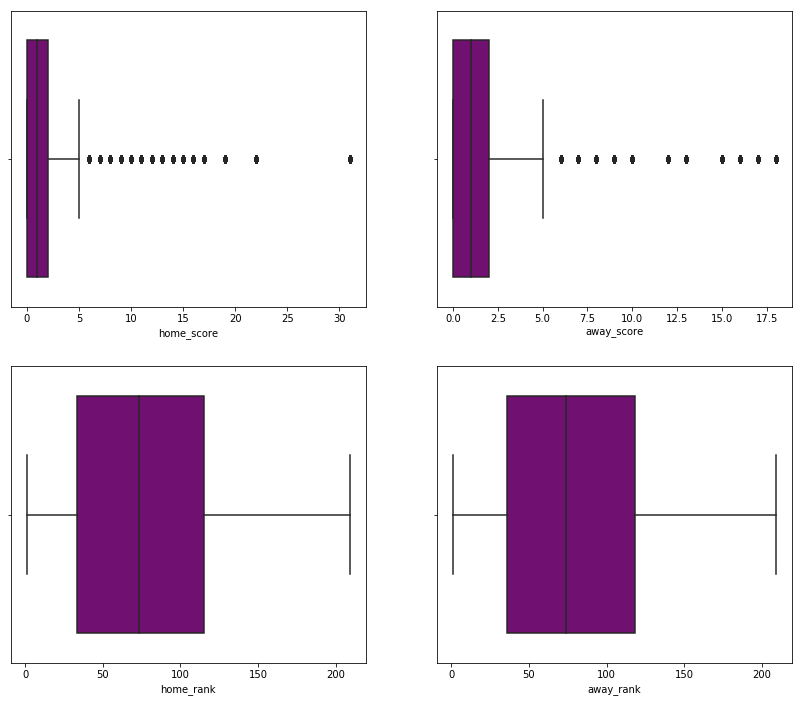

In [142]:
## Checking for outliers in columns; home_score, away_score, home_rank and away_rank

import matplotlib.pyplot as plt


## creating a variable containing the features we want to loop over
outliers = ['home_score', 'away_score','home_rank', 'away_rank']

## specifying the number of columns and rows we want in the resulting figure.This can be altered  at will
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(14,12))


##  Creating a function to loop over the given multiple features and give us the boxplot of the outliers## 
for ax, data,column in zip(axes.flatten(),df,outliers):
  sns.boxplot(df[column],ax=ax, color = 'purple')

From the boxplots, home_score and away_score are the only datasets with meaningful outliers.

In [0]:
## Dropping the outliers in home score and away score

df = df[df['home_score']<=5] 

df = df[df['away_score']<=5]

This means all values of home score greater than a score of 5 is dropped


In [97]:
df.shape

(1571621, 13)

## Exploratory Data Analysis

In [98]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank
628370,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,19.0
628371,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,70.0


In [99]:
## Checking for unique values 
## Tournaments unique values


df.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Gold Cup qualificati

In [20]:
## Frequency table showing the top 10 tournaments 

## Plotting the tournaments


tournament_freq =  df.tournament.value_counts()
tournament_freq.head(10)

Friendly                                551914
FIFA World Cup qualification            449005
UEFA Euro qualification                 139791
African Cup of Nations qualification     98313
AFC Asian Cup qualification              37742
UEFA Euro                                28006
Copa América                             24993
CFU Caribbean Cup qualification          24740
CECAFA Cup                               21731
African Cup of Nations                   19465
Name: tournament, dtype: int64

Friendlies are the most played games followed by World_cup, etc in the order above

In [101]:
df.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [67]:
df.year.value_counts().head()

2008    106020
2015    101363
2016     98407
2011     98079
2012     97282
Name: year, dtype: int64

## Polynomial Regression

Polynomial regression is used where the dependent and independent variables are not linear

#### Importing necessary libraries

In [0]:
## Importing necessary Libraries

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Plotting scatter plot of scores against rank

In [22]:
df.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
city              object
country           object
neutral             bool
year               int64
month              int64
away_rank        float64
confederation     object
home_rank        float64
dtype: object

##### HOME RANK

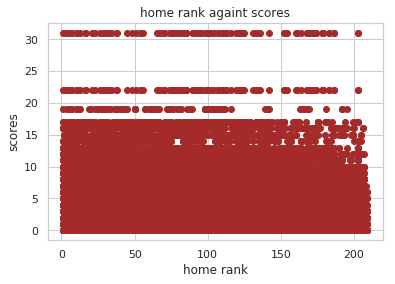

In [28]:
## Assigning data into groups of x and y

X= df['home_rank'].values.reshape(-1,1)
y = df['home_score'].values


## Plotting x and y to check the distribution

sns.set(context = 'notebook',style = 'whitegrid')

plt.scatter(X,y, color = 'brown')
plt.xlabel('home rank')
plt.ylabel('scores')
plt.title('home rank againt scores')
plt.show()



the datapoints are clearly not linealy related ,we can  therefore try and use polynomial regression HOWEVER, there may be istances of underfitting as the dataset has no given pattern

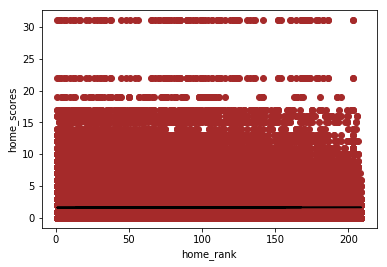

In [24]:
## Polynomial Regression

## Split data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


## Fitting Polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)


pol = LinearRegression()
pol.fit(x_poly,y)


## Plotting/Visualizing Polynomial Regression
plt.scatter(X,y, color = 'brown')
plt.plot(X, pol.predict(x_poly), color = 'black')
plt.xlabel ('home_rank')
plt.ylabel ('home_scores')
plt.show()


In [30]:
## Assessing Accuracy of the model

y_pred = pol.predict(x_poly)

print('Mean squared Error:', metrics.mean_squared_error(y,y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred)))

Mean squared Error: 2.7147839896275
Root Mean squared Error: 1.6476601559871198


In [53]:
df.home_score.describe()

count    1.632693e+06
mean     1.628874e+00
std      1.647671e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.100000e+01
Name: home_score, dtype: float64

The mean of the score(1.632693)s and the rmse(1.64766) are at a close proximity indicating low variance of the errors.

##### AWAY RANK

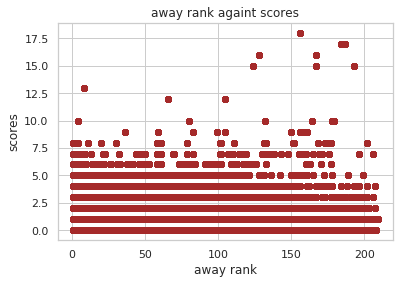

In [44]:
## Assigning data into groups of x and y

X= df['away_rank'].values.reshape(-1,1)
y = df['away_score'].values


## Plotting x and y to check the distribution

plt.scatter(X,y, color = 'brown')
plt.xlabel('away rank')
plt.ylabel('scores')
plt.title('away rank againt scores')
plt.show()



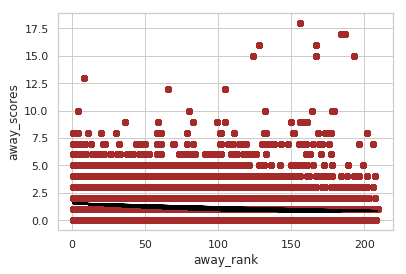

In [46]:
## Polynomial Regression

## Split data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


## Fitting Polynomial regression

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)


pol = LinearRegression()
pol.fit(x_poly,y)


## Plotting/Visualizing Polynomial Regression
plt.scatter(X,y, color = 'brown')
plt.plot(X, pol.predict(x_poly), color = 'black')
plt.xlabel ('away_rank')
plt.ylabel ('away_scores')
plt.show()


In [47]:
#
## Assessing Accuracy of the model

y_pred = pol.predict(x_poly)

print('Mean squared Error:', metrics.mean_squared_error(y,y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred)))

Mean squared Error: 1.63312587203658
Root Mean squared Error: 1.2779381331021389


In [52]:
df.away_score.describe()

count    1.632693e+06
mean     1.080477e+00
std      1.298495e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.800000e+01
Name: away_score, dtype: float64

The mean of the scores and the rmse are at a close proximity indicating low variance of the errors.

In [0]:
# ## Polynomial Regression 

# ## Split data into train and test using cross validation(k_folds)

# from sklearn.model_selection import KFold
# from sklearn import metrics


# ## Creating 10 folds of train sets
# folds = KFold(n_splits = 10)

# ## 
# RMSES = []
# count = 1
# for train_index, test_index in folds.split(x):
  
#   X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]
  
#   poly_reg = PolynomialFeatures(degrees = 2)
#   x_poly = poly_reg.fit_transform(x)
  
#   poly_reg = LinearRegression()
#   poly_reg.fit(x_poly,y)
  
#   y_pred =line.predict(x_test)
  
#   rmse_value = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
#   RMSES.append(rmse_value)
  
#   count = count+1
#   np.mean(RMSES)
  



### Conclusion

Model 1 ;  Polynomial Distribution: 

 i)The regression model was not a good fit for the model as there clearly are instances of underfitting.
 
 ii) The RMSE score was slightly commendable due to its close proximity to the mean, however this can be a case of the negative cancelling out with the positives and thus this results should be reconsidered

## Logistic Regression

In [0]:
## Importing Necessary Libraries

from sklearn.Linear.model  import LogisticRegression
from sklearn.ensemble import SVC
from sklearn.model_selection import train_test_split



In [0]:
## Creating a function that groups the dataset into win,lose and draw

def tournament(x):
  if x == 'Fifa World Cup':
    return 'world cup'
  elif x == 'Friendly':
    return 'friendly'
  else:
    return 'others'
#then apply function while creating a new column
df['tournament']=df.tournament.apply(lambda x: tournament(x))

In [57]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,confederation,home_rank
628370,Colombia,Paraguay,0,0,others,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,19.0
628371,Colombia,Paraguay,0,0,others,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,70.0
628372,Colombia,Paraguay,0,0,others,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,22.0
628373,Colombia,Paraguay,0,0,others,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,94.0
628374,Colombia,Paraguay,0,0,others,Barranquilla,Colombia,False,1993,8,67.0,CONMEBOL,58.0


In [0]:
pd.get_dummies(df) 

In [0]:
## grouping into x and y

x = df.[['home']]
y =

In [0]:
plt.scatter(df.)